ME 535 Winter 2020

Homework 5

### Due Noon Thursday 3/12

__1)__ Let's start with an unconstrained optimization problem. Gradient descent involves an update equation of the form:

$$x^{(k+1)} = x^{(k)} + t^{(k)} d^{(k)}$$

where the superscript $(k)$ is the iteration number, $x^{(k)}$ is the current point, $x^{(k+1)}$ is the next point, and $t^{(k)} \text{ and } d^{(k)}$ are the size and direction of the step at iteration $k$.

For gradient descent, the step direction is $-\nabla f(x^{(k)})$ but there is the separate issue of determining how far to step in that direction.

An exact line search uses $t = \text{ argmin}_{t>0} f(x+t d)$; i.e. it involves finding the location of the exact minimum along a line which can be relatively expensive to compute.

A common alternative approach is the __backtracking line search__ (with parameters $\alpha \in(0,1/2), \beta \in (0,1))$. Start at $t=1$, repeat $t=\beta t$ until the following condition is satisfied:

$$f(x^{(k)}+t d^{(k)}) < f(x^{(k)}) + \alpha t \nabla f(x^{(k)})^T d^{(k)}$$

The idea is to start with a "full step" and see if the function value decreased by the desired fraction ($\alpha$) of the decrease in the linear approximation (provided by the the current function value). If not, the step was too big, so reduce the stepsize (by a factor of $\beta$) and repeat until the condition is satisfied. The next iteration point is then provided by the left-hand side of the condition.

__1a)__ Write a python function to implement a backtracking line search.

__1b)__ Test your backtracking line search on a 1D example:

$$f(x) = x^2, \; x_0 = 1, \; \alpha = 0.5, \; \beta = 0.6$$

What value do you obtain for the next iterate $x^{(1)}$?

__1c)__ Modify the following python `gradient_descent` code to find new points using backtracking line search:

```
def grad_descent(f, gradf, x0, step, max_steps, tol):
    x = np.zeros([max_steps,2])
    val = np.zeros(max_steps)
    x[0] = x0
    val[0] = f(x[0])
    g = gradf(x[0])
    for i in range(1,max_steps):
        x[i] = x[i-1] - step * g
        val[i] = f(x[i])
        g = gradf(x[i])
        if np.linalg.norm(g)<tol:
            break
    return x,val,i
```

__1d)__ Use your codes from 1a and 1c to find the sequence of backtracking linesearch iterates from $x^{(0)} = (3,2)$ to the minimum of:

$$f(x_0,x_1) = x_0^2 + 3 x_1^2$$

__1e)__ Use the modified `arraycontourplot` from the Ch. 5 notebook to plot your backtracking search iterates together with the level sets of the objective function.

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
from scipy.sparse import diags
np.set_printoptions(precision=2)


In [67]:
# 1a)
def BackTrackLine(f,x0, df, t, alpha, beta):
    d = -df(x0)
    while f(x0+t*d) > f(x0)+alpha*t*np.dot(df(x0), d):
        t *= beta
    return t, x0+t*d

In [68]:
# 1b)
df = lambda x: 2*x[0]
f = lambda x: x[0]**2
x0 = np.array([1])

alpha = 0.5
beta = 0.6
t = 1
step, nextX = BackTrackLine(f,x0, df, t, alpha, beta)
print(step)
print(nextX)


0.36
[0.28]


In [69]:
# 1c)

def grad_descent(f, gradf, x0, step, max_steps, tol, alpha,beta):
    x = np.zeros([max_steps,len(x0)])
    val = np.zeros(max_steps)
    x[0] = x0
    val[0] = f(x[0])
    g = gradf(x[0])
    for i in range(1,max_steps):
        new_step,dummy = BackTrackLine(f,x[i-1], gradf, t, alpha, beta)
        x[i] = x[i-1] - new_step*gradf(x[i-1])
        val[i] = f(x[i])
        if LA.norm(gradf(x[i]))<tol:
            break
    return x,val,i

In [70]:
def arraycontourplot(x,xvals, yvals, fvals, levels=[-1000,0], labels=['x','y'], 
    titlestring='', filled=False):
    """
    inputs:
    xvals: a 1d numpy array of values for the first coordinate
    yvals: a 1d numpy array of values for the second coordinate
    fvals: a 2d numpy array of function values on the coordinate grid
    levels: a list of contour values
    vars: a list containing the symbolic variables
    titlestring: a string specifying the plot title
    -----
    product: a contourplot based on the array of function values
    """
    fig = plt.figure()
    X,Y = np.meshgrid(yvals,xvals) #switch for more intuitive format
    if filled==True:
        cp = plt.contourf(X, Y, fvals, levels, hatches=['x','+']) #, linestyles='dashed')
    else:
        cp = plt.contour(X, Y, fvals, levels) #, linestyles='dashed')
    # plt.clabel(cp, inline=True, fontsize=10)
    plt.title(titlestring)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    #plt.axis('square')
    plt.axis('tight')
    
    plt.plot(x.T[0],x.T[1], marker='o', markersize=10, fillstyle='none', linewidth=2)
    #plt.show()
    return cp

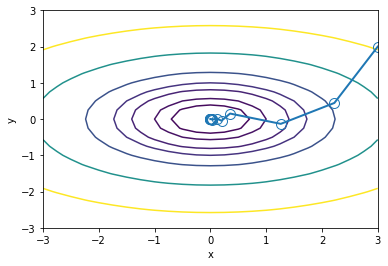

In [75]:
# 1d)
import matplotlib.pyplot as plt
x0 = np.array([3,2])

f = lambda x: x[0]**2+3*x[1]**2
gradf = lambda x: np.array([2*x[0], 6*x[1]])
step = 1
Max_step = 15
tolerance = 1e-4
alpha = 0.5
beta = 0.6
x,val, iterations = grad_descent(f, gradf, x0, step, Max_step, tolerance,alpha,beta)
#print(x)


# 1e)

n=25
xvals = np.linspace(-3,3,n)
yvals = np.linspace(-3,3,n)
fvals = np.zeros([n,n])
f2 = lambda x,y:x**2+3*y**2
for i in range(n):
    for j in range(n):
        fvals[j,i] =  f2(xvals[i],yvals[j])
        
levels=[0,0.5,1,2,3,5,10,20]
arraycontourplot(x,xvals, yvals, fvals, levels, labels=['x','y'], titlestring='', filled=False)

__2)__ Consider the following linear programming problem:

$$\text{Maximize} \qquad 2 x_0 + 3 x_1 + 4x_2$$

\begin{equation}
\begin{split}
\text{subject to} \qquad & x_0 & &+ 3 x_2 &\leq 600 \\
                  &     & x_1 &+ x_2  &\leq 300 \\
                  & x_0 + &x_1 &+ x_2  &\leq 400 \\
                  &      & x_1 & &\leq 250 \\
                  &  &  &\text{and } x_0,x_1,x_2 &\geq 0
\end{split}
\end{equation}

__2a)__ Convert this linear programming to the standard form with equality constraints.

__2b)__ Construct a linear programming tableau corresponding to this problem.

__2c)__ Write a python function to do the row operations corresponding to a pivot. Given a row `i` (specifying the equaiton to pivot on) and a column `j` (specifying the variable entering the basis) and the previous state of the `tableau` array, your function should:

- Multiply the row by an appropriate factor so that `tableau[i,j]` becomes 1.

- Subtract a multiple of row `i` from each of the other rows so that the remaining entries of row `j` (other than `tableau[i,j]` become zero.

- Return the updated `tableau`.

__2d)__ Use your `tableau` from __2b__ and your pivot code from __2c__ to obtain an initial basic feasible solution, then use your code to pivot to new extreme points until you obtain an optimal solution. At each step in the optimization, explain the choice of the variable entering the basis, and state the values of each variable and the objective function.

Be sure to clearly state the optimal solution, explain how you read it from your final tableau, and how you know it is optimal.

##### 2a)
$x_0$ + 3*$x_2$ + $slack_0$ = 600   
$x_1$ + $x_2$ + $slack_1$ = 300  
$x_0$ + $x_1$ + $x_2$ + $slack_2$ = 400  
$x_1$ + $slack_3$ = 250  

In [24]:
# 2b)
tableau = [[1,0,3,1,0,0,0,600],
           [0,1,1,0,1,0,0,300],
           [1,1,1,0,0,1,0,400],
           [0,1,0,0,0,0,1,250],
           [2,3,4,0,0,0,0,0]]

In [26]:
import numpy as np

# 2c
def pivot(tableau, i, j):
    '''
    Args:
        tableau: 2D numpy array
        i: int row for the equation to pivot on
        j: int column specifying the variable entering the basis
    Return:
        tableau: 2D numpy array fro updated tableau
    '''
    m, n = len(tableau), len(tableau[0])
    # multiply the row by factor for mat[i, j] to be 1
    factor = tableau[i][j]
    for col in range(n):
        tableau[i][col] /= factor
    # run thru the mat
    for row in range(m):
        # if the row is i, meaning we operate before, continue
        if row == i:
            continue
        # get the rowFactor from the row we gonna operate and divide by 1
        rowFactor = tableau[row][j]
        for col in range(n):            
            tableau[row][col] -= (rowFactor * tableau[i][col])
    return tableau

In [47]:
# 2d 
tableau = [[1,0,3,1,0,0,0,600],
           [0,1,1,0,1,0,0,300],
           [1,1,1,0,0,1,0,400],
           [0,1,0,0,0,0,1,250],
           [2,3,4,0,0,0,0,0]]
print('Original tableau')
for i in tableau:
    print(i)
print(' ')

tableau = pivot(tableau,0,0)
print(' First time pivoting')
for i in tableau:
    print(i)
print(' ')

print(' Second time pivoting')
tableau = pivot(tableau,1,1)
for i in tableau:
    print(i)
print(' ')

print(' Third time pivoting')
tableau = pivot(tableau,2,2)
for i in tableau:
    print(i)


Original tableau
[1, 0, 3, 1, 0, 0, 0, 600]
[0, 1, 1, 0, 1, 0, 0, 300]
[1, 1, 1, 0, 0, 1, 0, 400]
[0, 1, 0, 0, 0, 0, 1, 250]
[2, 3, 4, 0, 0, 0, 0, 0]
 
 First time pivoting
[1.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 600.0]
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 300.0]
[0.0, 1.0, -2.0, -1.0, 0.0, 1.0, 0.0, -200.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 250.0]
[0.0, 3.0, -2.0, -2.0, 0.0, 0.0, 0.0, -1200.0]
 
 Second time pivoting
[1.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 600.0]
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 300.0]
[0.0, 0.0, -3.0, -1.0, -1.0, 1.0, 0.0, -500.0]
[0.0, 0.0, -1.0, 0.0, -1.0, 0.0, 1.0, -50.0]
[0.0, 0.0, -5.0, -2.0, -3.0, 0.0, 0.0, -2100.0]
 
 Third time pivoting
[1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 100.0]
[0.0, 1.0, 0.0, -0.3333333333333333, 0.6666666666666667, 0.3333333333333333, 0.0, 133.33333333333334]
[-0.0, -0.0, 1.0, 0.3333333333333333, 0.3333333333333333, -0.3333333333333333, -0.0, 166.66666666666666]
[0.0, 0.0, 0.0, 0.3333333333333333, -0.6666666666666667, -0.3333333333333333, 1.0

#### 2d) explanation
First time, I select x0 at (0,0) as the basic variable since it's not 0 and it is 1.0 which get less numerical error when factoring and substraction.
Secondly, I select x1 at (1,1)  as the basic variable since it's not 0 and it is 1.0 which get less numerical error when factoring and substraction. Also I only have x1 and x2 that can be selected and I cannot pivot in the first row since it will change the independence between x1 and x2.
Thirdly, I select x2 at (2,2) as the basic variable since it's not 0 and rows of x0 and x1 already be selected so I can only choose third column and I choose thrid row.

In the end, the optimal solution is 1266.6666. where x0 = 100,  x1 = 133.33, x2= 166.66.  
Z = 1266.67 -0.33$S_1$ -1.33$S_2$ -1.67$S_3$